In [3]:
import os 
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import *
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import *

In [4]:
train_dir ='New Train'
test_dir='New Test'

In [5]:
num_classes=len(glob.glob(train_dir+"/*")) 
print(num_classes,"Classes")

21 Classes


In [6]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )
test_datagen=ImageDataGenerator(rescale=1./255)
     

In [7]:
input_shape=(224,224,3)
train_generator =train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(224,224),batch_size=32)

Found 21860 images belonging to 21 classes.
Found 5475 images belonging to 21 classes.


In [7]:
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import *
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import Input, Add, Conv2D, MaxPooling2D

In [8]:
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu',name="conv2d_1"))
model.add(MaxPooling2D(pool_size=(3, 3),name="max_pooling2d_1"))
model.add(Conv2D(32, (3, 3),activation='relu',name="conv2d_2"))
model.add(MaxPooling2D(pool_size=(2, 2),name="max_pooling2d_2"))
model.add(Conv2D(64, (3, 3),activation='relu',name="conv2d_3"))
model.add(MaxPooling2D(pool_size=(2, 2),name="max_pooling2d_3"))   
model.add(Flatten(name="flatten_1"))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0

In [9]:
validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)

Found 5475 images belonging to 21 classes.


In [10]:
from keras.models import load_model
loaded_model = load_model("network.h5")


In [8]:
# model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
# history = model.fit(
#     train_generator,
#     steps_per_epoch=None,
#     epochs=5,
#     validation_data=validation_generator,
#     validation_steps=None,
#     verbose=1,
#     callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
#     shuffle=True
#     )
     

Epoch 1/5
684/684 [==============================] - 1935s 3s/step - loss: 1.3467 - accuracy: 0.5786 - val_loss: 0.8319 - val_accuracy: 0.7255 - lr: 0.0010
Epoch 2/5
684/684 [==============================] - 1370s 2s/step - loss: 0.7295 - accuracy: 0.7555 - val_loss: 0.4590 - val_accuracy: 0.8466 - lr: 0.0010
Epoch 3/5
684/684 [==============================] - 1614s 2s/step - loss: 0.5322 - accuracy: 0.8212 - val_loss: 0.4619 - val_accuracy: 0.8471 - lr: 0.0010
Epoch 4/5
684/684 [==============================] - 1386s 2s/step - loss: 0.4348 - accuracy: 0.8496 - val_loss: 0.4182 - val_accuracy: 0.8550 - lr: 0.0010
Epoch 5/5
684/684 [==============================] - 869s 1s/step - loss: 0.3583 - accuracy: 0.8797 - val_loss: 0.2668 - val_accuracy: 0.9089 - lr: 0.0010


In [9]:
# print("[INFO] Calculating model accuracy")
# scores = loaded_model.evaluate(validation_generator)
# print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
172/172 [==============================] - 161s 931ms/step - loss: 0.2743 - accuracy: 0.9072
Test Accuracy: 90.72146415710449


In [5]:
# model.save("network.h5")

In [11]:
from tensorflow.keras.utils import load_img, img_to_array 


1/1 [==============================] - 4s 4s/step
Apple___Black_rot


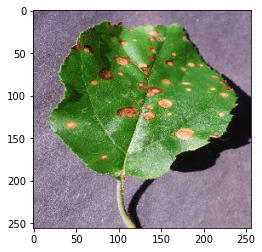

In [12]:
classes=list(train_generator.class_indices.keys())

def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url='0bc40cc3-6a85-480e-a22f-967a866a56a1___JR_FrgE.S 2784.JPG'
result_cnn = loaded_model.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_cnn,axis=1)
print(classes[classresult[0]])

1/1 [==============================] - 0s 43ms/step
Tomato___Early_blight


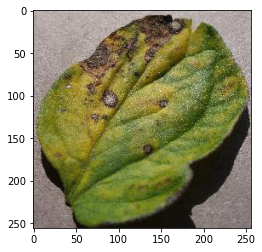

In [13]:
classes=list(train_generator.class_indices.keys())

def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url='1ba88993-c3f8-462d-bd1b-e10819b9c96f___RS_Erly.B 8396.JPG'
result_cnn = loaded_model.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_cnn,axis=1)
print(classes[classresult[0]])

1/1 [==============================] - 0s 39ms/step
Corn_(maize)___Common_rust_


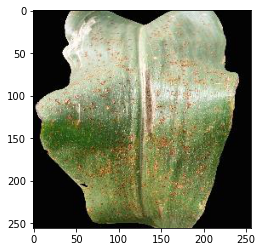

In [14]:
classes=list(train_generator.class_indices.keys())

def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url='RS_Rust 1585.JPG'
result_cnn =loaded_model.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_cnn,axis=1)
print(classes[classresult[0]])

1/1 [==============================] - 0s 37ms/step
Tomato___Spider_mites Two-spotted_spider_mite


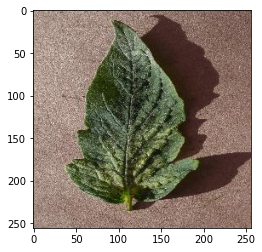

In [15]:
classes=list(train_generator.class_indices.keys())
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url='2db5ec80-9a7d-4963-9aaa-24014848a087___Com.G_SpM_FL 8967.JPG'

result_cnn = loaded_model.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease) 

classresult=np.argmax(result_cnn,axis=1)
print(classes[classresult[0]])

1/1 [==============================] - 0s 38ms/step
Apple___healthy


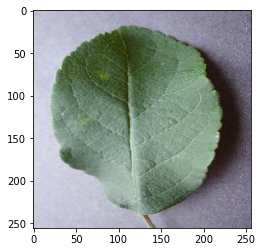

In [16]:
classes=list(train_generator.class_indices.keys())
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url='3a1ca70b-00f0-4a0b-a973-8db1da714e6c___RS_HL 7759.JPG'

result_cnn = loaded_model.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_cnn,axis=1)
print(classes[classresult[0]])